In [37]:
# Standard python libraries
import os
import requests
import pickle
# Essential DS libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import shap
shap.initjs()

# LightAutoML presets, task and report generation
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task

from lightautoml.addons.interpretation import SSWARM

## 1. [Catboost tutorial](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Catboost%20tutorial.html#Catboost-tutorial)

In [38]:
from catboost import CatBoostClassifier, CatBoostRegressor

In [39]:
X, y = shap.datasets.california(n_points=500)
model = CatBoostRegressor(iterations=300, learning_rate=0.1, random_seed=123)
model.fit(X, y, verbose=False, plot=False)

explainer = shap.TreeExplainer(model)
shap_values_default = explainer(X)


In [40]:
df_train = X.assign(target=y)

roles = {
    'target': "target"
}

automl = TabularAutoML(
    task = Task("reg"), 
    timeout = 30,
    cpu_limit = 4,
    reader_params = {'n_jobs': 4, 'cv': 5, 'random_state': 77},
)
automl.fit_predict(df_train, roles = roles, verbose = 0)

explainer = SSWARM(automl, random_state=77)
shap_values_sswarm = explainer.shap_values(df_train, n_jobs=4)

  8%|▊         | 76/1000 [00:25<05:11,  2.97it/s] 


KeyboardInterrupt: 

In [ ]:
shap_values_sswarm = explainer.shap_values(df_train, T=1000, n_jobs=4)

100%|██████████| 2000/2000 [00:03<00:00, 589.52it/s]


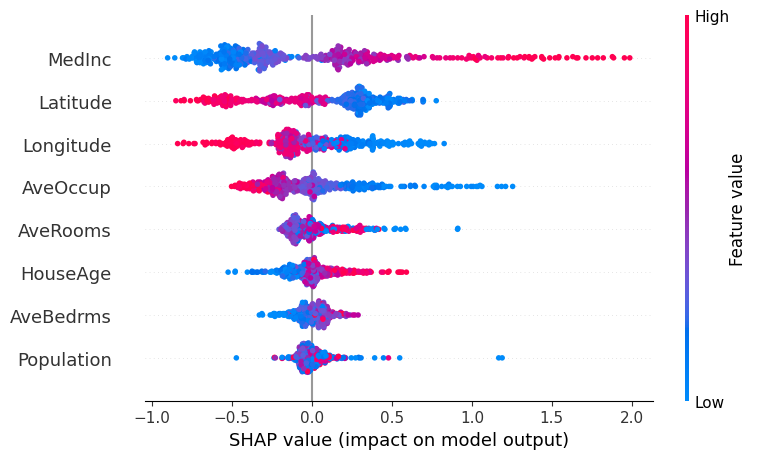

In [ ]:
shap.summary_plot(shap_values_default.values, X)

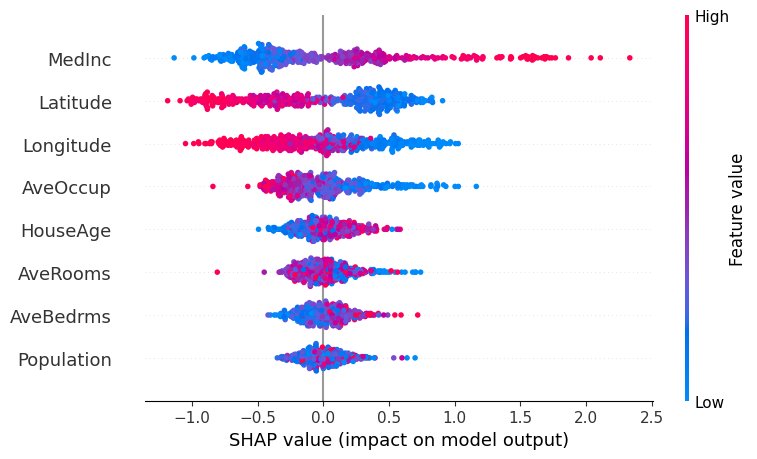

In [ ]:
shap.summary_plot(shap_values_sswarm, X[explainer.used_feats])

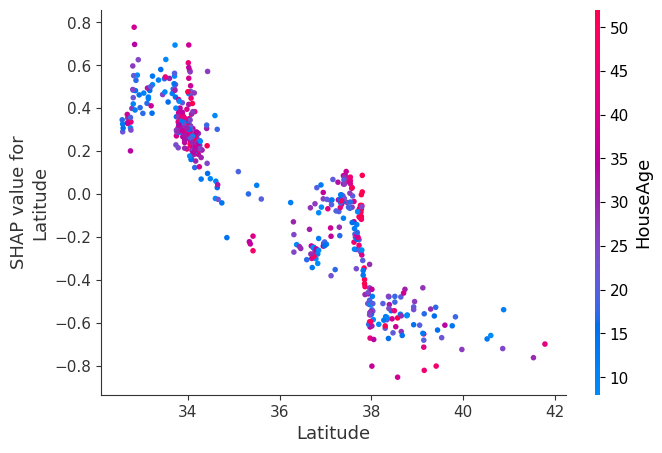

In [ ]:
shap.dependence_plot("Latitude", shap_values_default.values, X, interaction_index="HouseAge")

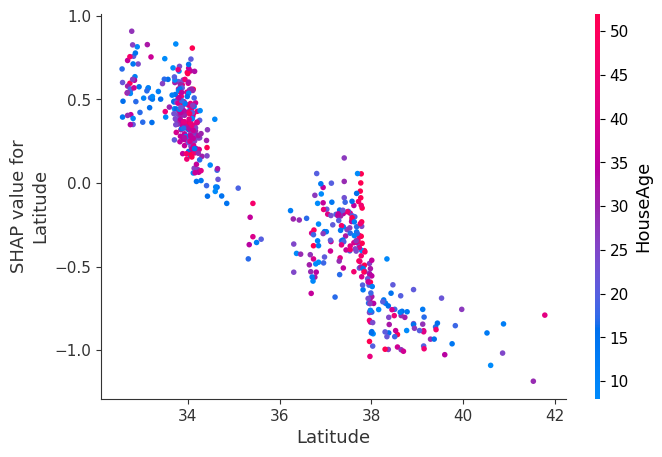

In [ ]:
shap.dependence_plot("Latitude", shap_values_sswarm, X[explainer.used_feats], interaction_index="HouseAge")

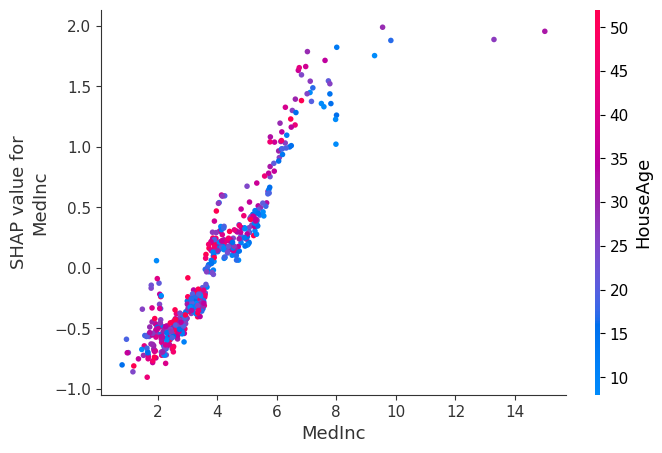

In [ ]:
shap.dependence_plot("MedInc", shap_values_default.values, X, interaction_index="HouseAge")

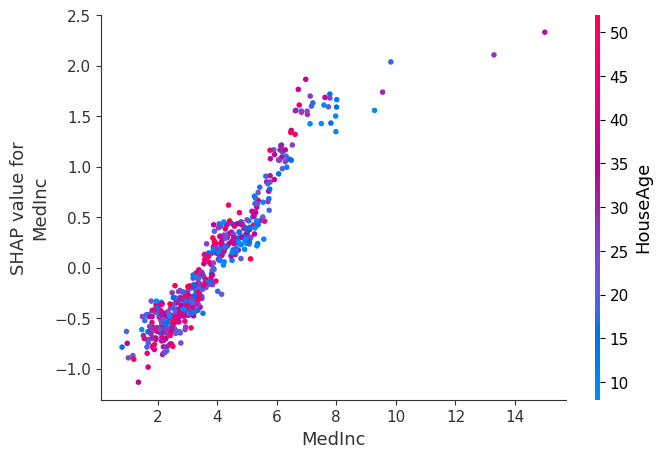

In [ ]:
shap.dependence_plot("MedInc", shap_values_sswarm, X[explainer.used_feats], interaction_index="HouseAge")

## Census income

In [42]:
import lightgbm as lgb

In [43]:
X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)

In [44]:

params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True,
    "early_stopping_round": 50,
}

model = lgb.train(
    params,
    d_train,
    10000,
    valid_sets=[d_test],
)

Found `early_stopping_round` in params. Will use it instead of argument


[1]	valid_0's binary_logloss: 0.530915
Training until validation scores don't improve for 50 rounds
[2]	valid_0's binary_logloss: 0.513733
[3]	valid_0's binary_logloss: 0.498824
[4]	valid_0's binary_logloss: 0.485607
[5]	valid_0's binary_logloss: 0.473667
[6]	valid_0's binary_logloss: 0.463023
[7]	valid_0's binary_logloss: 0.4534
[8]	valid_0's binary_logloss: 0.444444
[9]	valid_0's binary_logloss: 0.436411
[10]	valid_0's binary_logloss: 0.428679
[11]	valid_0's binary_logloss: 0.421856
[12]	valid_0's binary_logloss: 0.415378
[13]	valid_0's binary_logloss: 0.409536
[14]	valid_0's binary_logloss: 0.404116
[15]	valid_0's binary_logloss: 0.398999
[16]	valid_0's binary_logloss: 0.394169
[17]	valid_0's binary_logloss: 0.389559
[18]	valid_0's binary_logloss: 0.385387
[19]	valid_0's binary_logloss: 0.381257
[20]	valid_0's binary_logloss: 0.377656
[21]	valid_0's binary_logloss: 0.374036
[22]	valid_0's binary_logloss: 0.370661
[23]	valid_0's binary_logloss: 0.367658
[24]	valid_0's binary_logloss:

In [45]:
explainer_tree = shap.TreeExplainer(model, data=X_train.sample(500), feature_perturbation="interventional", model_output="probability")
shap_values = explainer_tree.shap_values(X_test)

 99%|===================| 6444/6513 [01:02<00:00]        

In [50]:
df_train = X_train.assign(target=y_train)

roles = {
    'target': "target"
}

automl = TabularAutoML(
    task = Task("binary"), 
    timeout = 100,
    cpu_limit = 4,
    reader_params = {'n_jobs': 4, 'cv': 5, 'random_state': 77},
)
automl.fit_predict(df_train, roles = roles, verbose = 1)

explainer = SSWARM(automl, random_state=77)
shap_values_sswarm = explainer.shap_values(X_test.assign(target=y_test), n_jobs=4)

[14:05:34] Stdout logging level is INFO.
[14:05:34] Task: binary

[14:05:34] Start automl preset with listed constraints:
[14:05:34] - time: 100.00 seconds
[14:05:34] - CPU: 4 cores
[14:05:34] - memory: 16 GB

[14:05:34] Train data shape: (26048, 13)

[14:05:35] Layer 1 train process start. Time left 99.57 secs
[14:05:37] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[14:05:42] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.9263295570931375
[14:05:42] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[14:05:42] Time left 92.17 secs

[14:05:43] Selector_LightGBM fitting and predicting completed
[14:05:46] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
[14:05:53] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.9285587643831887
[14:05:53] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
[14:05:53] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 1.00 secs
[14:05:56] Hyperparameters optimization for Lvl_0_Pip

100%|██████████| 1000/1000 [01:46<00:00,  9.37it/s]


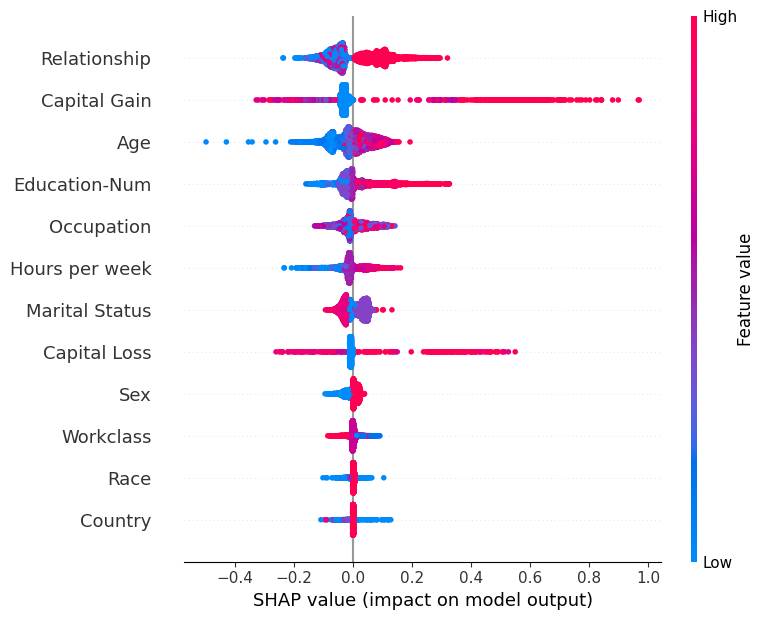

In [ ]:
shap.summary_plot(shap_values, X_test)

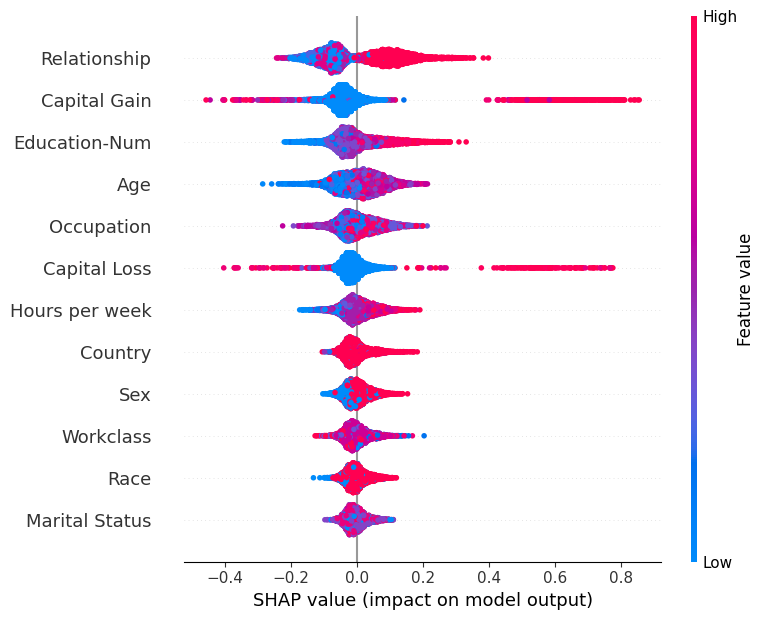

In [ ]:
shap.summary_plot(shap_values_sswarm[1], X_test[explainer.used_feats])

In [55]:
shap.force_plot(explainer_tree.expected_value, shap_values[1, :], X_test.iloc[1, :])

In [57]:
shap.force_plot(explainer.expected_value[1], shap_values_sswarm[1, 1, :], X_test.iloc[1:2][explainer.used_feats])

In [58]:
shap.force_plot(explainer_tree.expected_value, shap_values, X_test.iloc[:1000])

shap.plots.force is slow for many thousands of rows, try subsampling your data.


array([0.76230407, 0.23769672], dtype=float32)